# Capture the tail risk with the Omega ratio

The Omega ratio is a weighted ratio of gains and losses above a threshold return. It captures more information about returns than similar metrics like the Sharpe ratio.

It does this by adding up the area under the distribution around the threshold return. The area above the threshold measures the weight of the gains. The area below the threshold measures the weight of the losses. The Omega ratio is the positive area divided by the negative area.

Without considering the Omega ratio, you miss important information about risk.

Sophisticated investors like hedge funds use the Omega ratio. They use it because alternative investments have long-tail risks not measured by other metrics like the Sharpe ratio. Even if you’re not investing in exotic derivatives, the Omega ratio is useful.

A simple test shows us AAPL’s returns are not normally distributed.

Capture your tail risk with the Omega ratio
The skew (which measures symmetry) is -0.01. A normal distribution has skew of 0. The kurtosis (which measures outliers) is 5.3. A normal distribution has kurtosis of 3.

Using performance metrics that don’t take the entire distribution into consideration misses important information about risk. Use the Omega ratio to capture it.

- Get stock price data
- Compute the Omega ratio
- Assess AAPL with the Omega ratio


In [1]:
# Start by importing the libraries and getting the data. I like to use yfinance for getting stock data.

import yfinance as yf
import numpy as np
# Grab the data and compute returns.

data = yf.download("AAPL", start="2020-01-01", end="2021-12-31")

returns = data["Adj Close"].pct_change()

[*********************100%***********************]  1 of 1 completed


In [4]:
# Compute the Omega ratio.
def omega_ratio(returns, required_return=0.0):
    """Determines the Omega ratio of a strategy.

    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    required_return : float, optional
        Minimum acceptance return of the investor. Threshold over which to
        consider positive vs negative returns. It will be converted to a
        value appropriate for the period of the returns. E.g. An annual minimum
        acceptable return of 100 will translate to a minimum acceptable
        return of 0.018.

    Returns
    -------
    omega_ratio : float

    Note
    -----
    See <https://en.wikipedia.org/wiki/Omega_ratio> for more details.
    """

    return_threshold = (1 + required_return) ** (1 / 252) - 1

    returns_less_thresh = returns - return_threshold

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])

    if denom > 0.0:
        return numer / denom
    else:
        return np.nan

<AxesSubplot:>

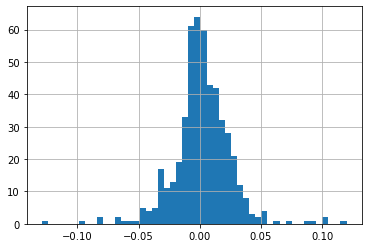

In [2]:
# Use the Omega ratio

# When analyzing a stock, investment returns, or strategy performance, start with the return distribution. If the returns have skew and kurtosis, consider using the Omega ratio.

# Going back to the AAPL example, create a distribution of returns in one line of code.

returns.hist(bins=50)

In [6]:
# You can check the skew and kurtosis.

print(returns.skew())
print(returns.kurtosis())
# And finally, compute the Omega ratio.

omega_ratio(returns, 0.07)

-0.011892043042962604
5.349587095586288


1.2413490748955422